In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

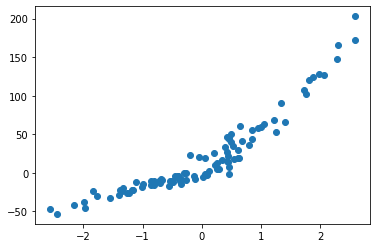

In [77]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)
plt.scatter(x, y)

In [78]:
print(x.shape)
print(y.shape)

y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [82]:
#Matrice X
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
print(X.shape)
print(X[:10])

(100, 3)
[[ 1.96065658  1.40023447  1.        ]
 [ 0.01343264 -0.11589926  1.        ]
 [ 0.21200582  0.46044089  1.        ]
 [ 0.12515832 -0.35377721  1.        ]
 [ 0.24206363 -0.49199962  1.        ]
 [ 1.61885738 -1.27234326  1.        ]
 [ 0.17827154  0.42222215  1.        ]
 [ 1.82254857 -1.35001799  1.        ]
 [ 0.06700458  0.25885242  1.        ]
 [ 0.17534631  0.41874372  1.        ]]


In [83]:
theta = np.random.randn(3, 1)
theta

array([[0.58928928],
       [0.58721244],
       [1.02323834]])

In [84]:
def model(X, theta):
    return X.dot(theta)

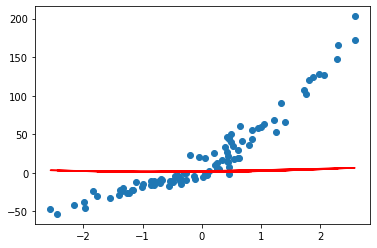

In [85]:
plt.scatter(x, y)
plt.plot(x, model(X,theta), c='red')

In [86]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [87]:
cost_function(X, y, theta)

1362.181404294632

In [88]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [89]:
def gradient_descent(X, y, theta, learning_rate, n):
    cost_history = np.zeros(n)
    for i in range(n):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [90]:
theta_final, cost_history = gradient_descent(X, y, theta, 0.01, 1000)

In [91]:
theta_final

array([[ 9.84748479],
       [40.52785485],
       [ 7.54145561]])

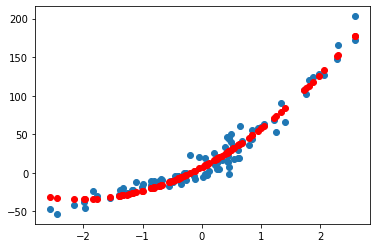

In [100]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

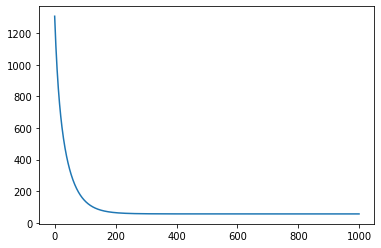

In [101]:
plt.plot(range(1000), cost_history)

In [102]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum() 
    v = ((y - y.mean())**2).sum()
    return 1 - (u/v)

In [103]:
coef_determination(y, predictions)

0.95504052736385